# Part 1: R basics and Calculating Screening Values 

Members of the K'avi have fished the waters on their land for many years to provide food for their community. To manage these waters, K'avi tribal fishery managers have been monitoring fish growth rates across the local water bodies in their community.

However, many members of the community have begun to experience health problems associated with heavy metal poisoning. Historically, a factory used to be located upstream of the riverways fished by the K'avi, and waste from this factory was dumped into the nearby waters. Tribal fishery managers are now concerned that members of the community are being exposed to heavy metals through the fish that have been caught in these waters. As a result, they now want to start recording the concentrations of methylmercury in the belly fat of fish in the area. 

According to the [FDA](https://www.fda.gov/food/environmental-contaminants-food/technical-information-development-fdaepa-advice-about-eating-fish-those-who-might-become-or-are) the safe limit for methylmercury in fish, or screening value, depends on how often fish is consumed, and can range from 0.15ug/g to 0.46ug/g. Above 0.46ug/g should be avoided! This module will explore data on fish size and amount of methylmercury, starting with R basics and learning about how to calculate safe levels of fish consumption. 

## Loading libraries 

To use different functions, we need to install and load packages. Think of functions as a tool, and a package as a toolbox. For this module we will bring in [tidyverse](https://www.tidyverse.org/), which is a collection of useful packages for data science. 

In [1]:
# Load packages 
if(!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Creating objects in R 

We will work with different types of objects and data types, including numbers, characters, vectors, and data frames. Here we start with creating objects for the variables and parameters used to calculate the safe limit of fish consumption. According to the FDA, the screening value, or amount of safe fish consumption, depends on a person's body weight and how often they consume the fish. 

First, the variabls `weight` and `days_per_week` are set. 

Once we create an object, we can use math or functions on it. Below we calculate `CR`, the mean daily consumption rate of the species of interest (g/d), based on the `days_per_week`

In [3]:
# Define variables
weight = 160 # lbs
days_per_week = 2 # days per week eating fish 

# print the values 
print(weight)
print(days_per_week)

# use days per week to calculate mean daily consumption rate 
cr = 110*days_per_week/7 
print(cr)

[1] 160
[1] 2
[1] 31.42857


## Calculating screening values for mercury in fish

Below we use the `weight`, mean daily consumption rate `cr`, and the reference dose `RfD` to calculate the screening value, based on FDA recommendations. Because the equation requires body weight in kg, we multiply our body weight in lbs by 0.45. 

$SV = RfD*weight*0.45/CR$

In [4]:
# Create new object for the reference dose
RfD = 0.1 # ug mercury /kg body weight/day

# Calculate safe limit 
safe_limit = RfD * weight * 0.45 / cr

print(safe_limit)

[1] 0.2290909


Try changing the value for `weight` or `days_per_week`, and rerunning the two code chunks above to see the new safe screening value. 

### Creating vectors 

Next we will create a vector, which is list of the same type of object, that can similarly be used in a function or equation. Below we have two vectors, `weight` and `servings`. 




In [12]:
# Create vectors 
weight = c(140, 175, 200)
servings = c(1, 6, 3)

# can print entire vector 
print(weight)
print(servings)

# or a single value from a vector 
weight[1]

[1] 140 175 200
[1] 1 6 3


[1] 140

### Creating a data frame from vectors 

Multiple vectors of the same length become columns in a data frame. Below we make a data frame named `sv_df`. When we preview it using the `head()` function, we can see it is comprised of two columns, with the same name as the vectors we created. 

Inside a data frame, columns are referred to using `$`. We can also preview a single row, using brackets. 

We then add a third column, where we apply the equation for the screening value to each row 

In [22]:
# create data frame with two columns - from the vectors weight, servings 
sv_df <- data.frame(weight, servings)

head(sv_df) # preview the entire data frame 

head(sv_df$weight) # see the column weight 

# Add column for screening value
sv_df$screen_val = RfD * sv_df$weight * 0.45 / (110 * sv_df$serving / 7)

head(sv_df)

,weight,servings
,<dbl>,<dbl>
1,140,1
2,175,6
3,200,3


[1] 140 175 200

,weight,servings,screen_val
,<dbl>,<dbl>,<dbl>
1,140,1,0.40090909
2,175,6,0.08352273
3,200,3,0.19090909


## Visualizing Screening Value vs. Servings Per Week with ggplot

Above, we used `head()` to preview our data frame. For longer data frames this will print out the first 6 rows. 

Another way to preview and explore data frames is to visualize it. Throughout this module, we will use [ggplot2](https://ggplot2.tidyverse.org/). This package was loaded with `tidyverse`. 

We will create a plot step by step, starting with running `ggplot()` with our dataframe as the input. We then add layers to it using a plus sign. 


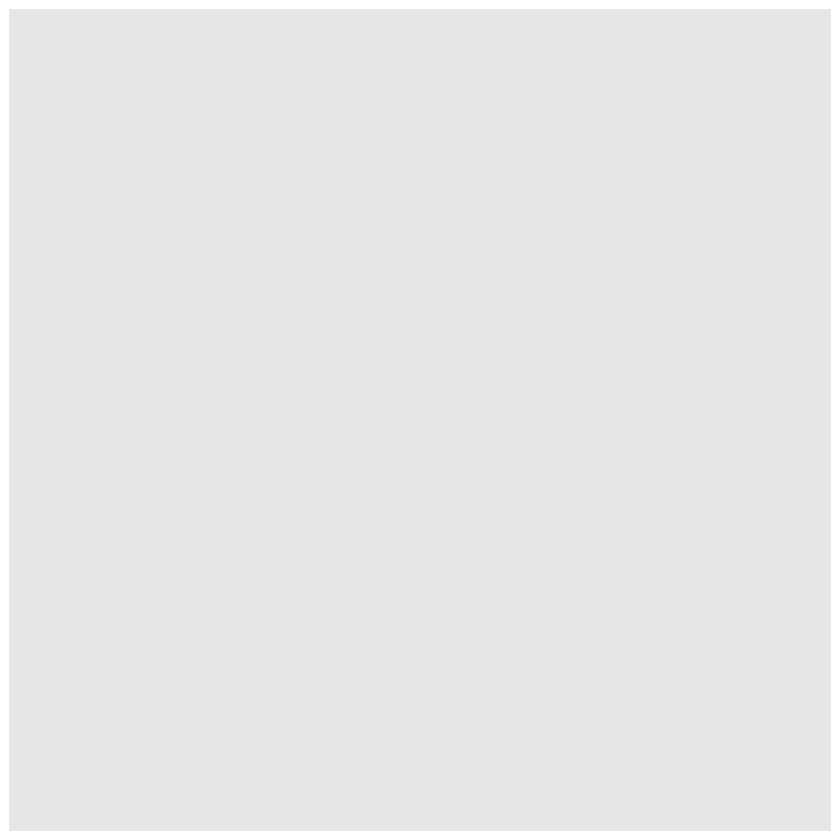

In [25]:
ggplot(data=sv_df)


Starting with `ggplot()` created the plot, but we need to also include the variables we want to plot. We do this using `aes()` and then include the column name you want on the x-axis, and the column name for the y-axis. 


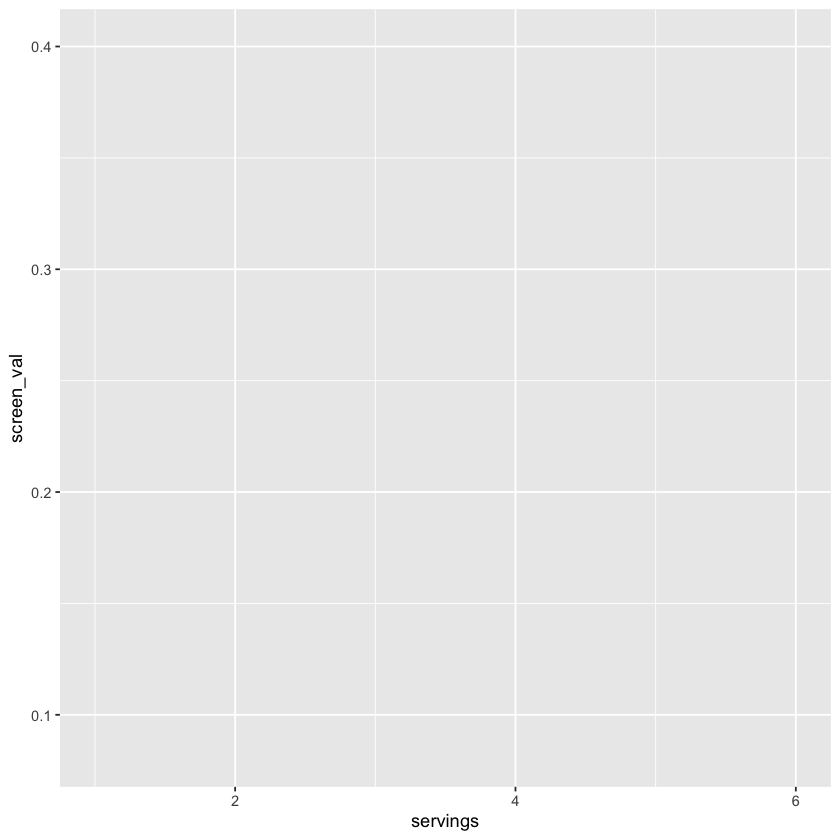

In [29]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val))


Next we need to assign a `geom` - this could be a scatter plot, line plot, or boxplot. We will start with plotting as columns, using `geom_col()`. 


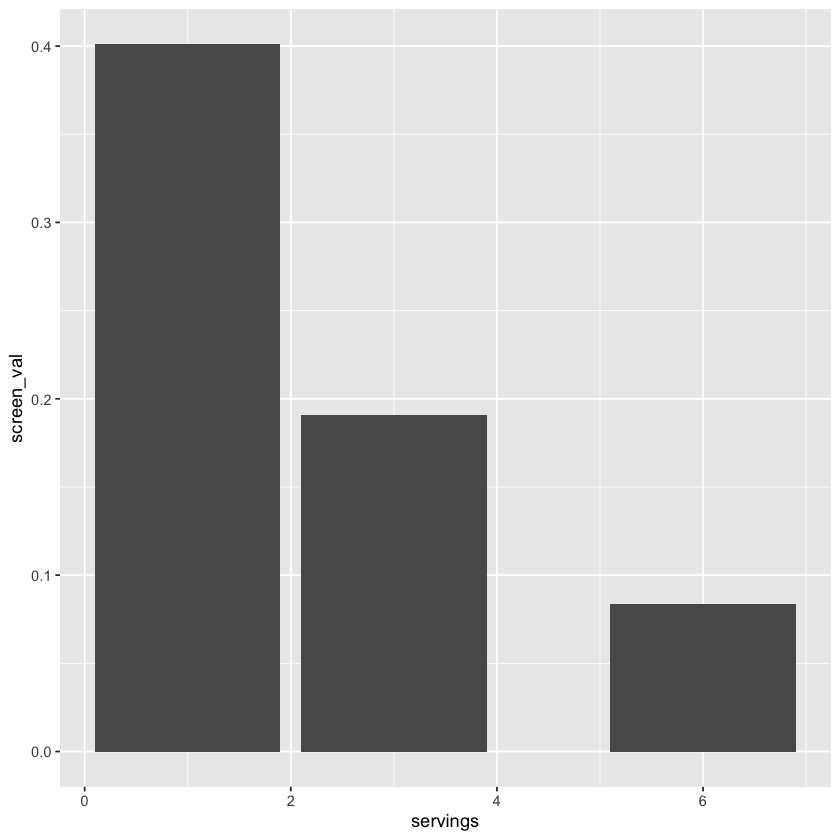

In [31]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val)) + 
    geom_col()


Now we have a draft of our first plot! We can continue to add layers and change the settings to have the plot tell us more about our data, or to make it look nicer. 

Variables can be included as colors - in this example we set the weight to `fill` which will fill in the column with a color gradient for our weight values. 


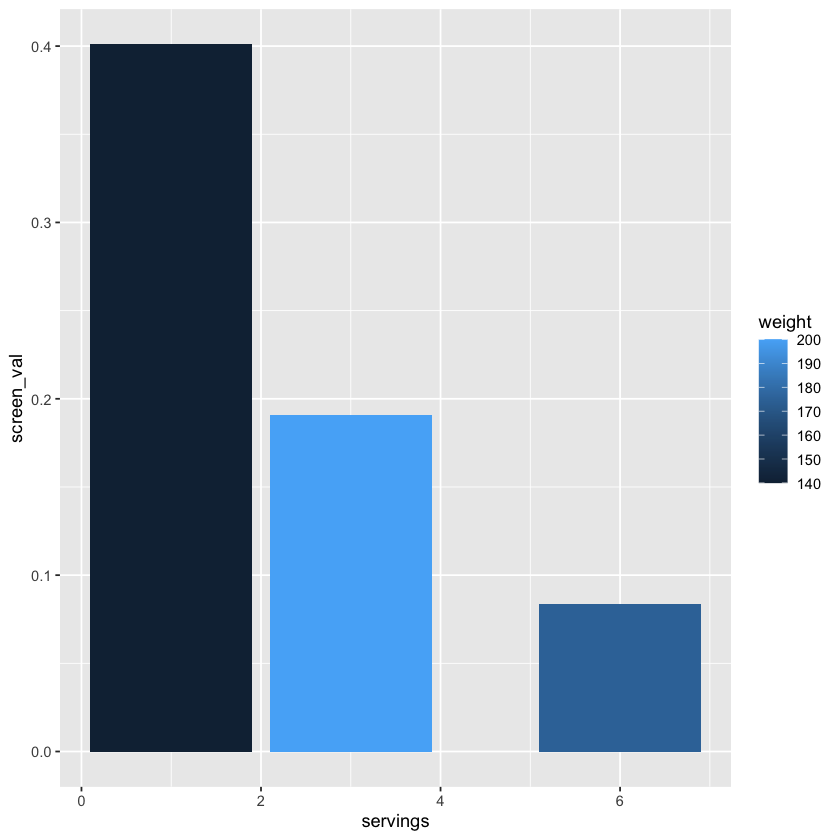

In [32]:
 ggplot(data=sv_df, 
        aes(x=servings, y=screen_val, fill=weight)) + 
    geom_col()


We can also change the `theme`, which alters the background and style of our plot. 


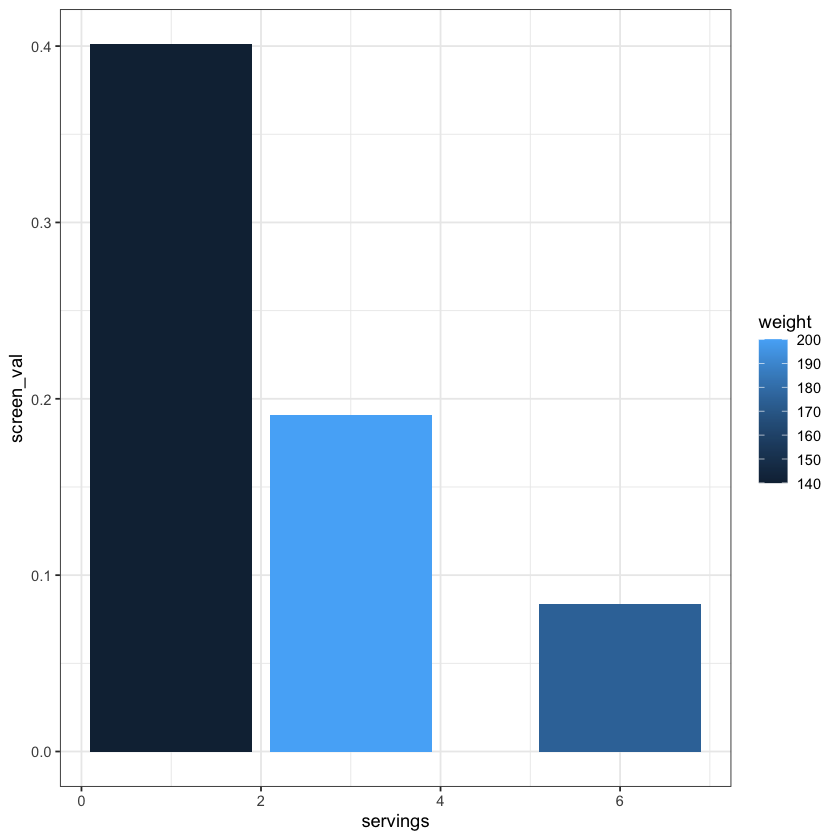

In [36]:
ggplot(data=sv_df, 
       aes(x=servings, y=screen_val, fill=weight)) + 
    geom_col() + 
    theme_bw() 


Finally we can add a title and change the labels to be more descriptive using `labs()`. 

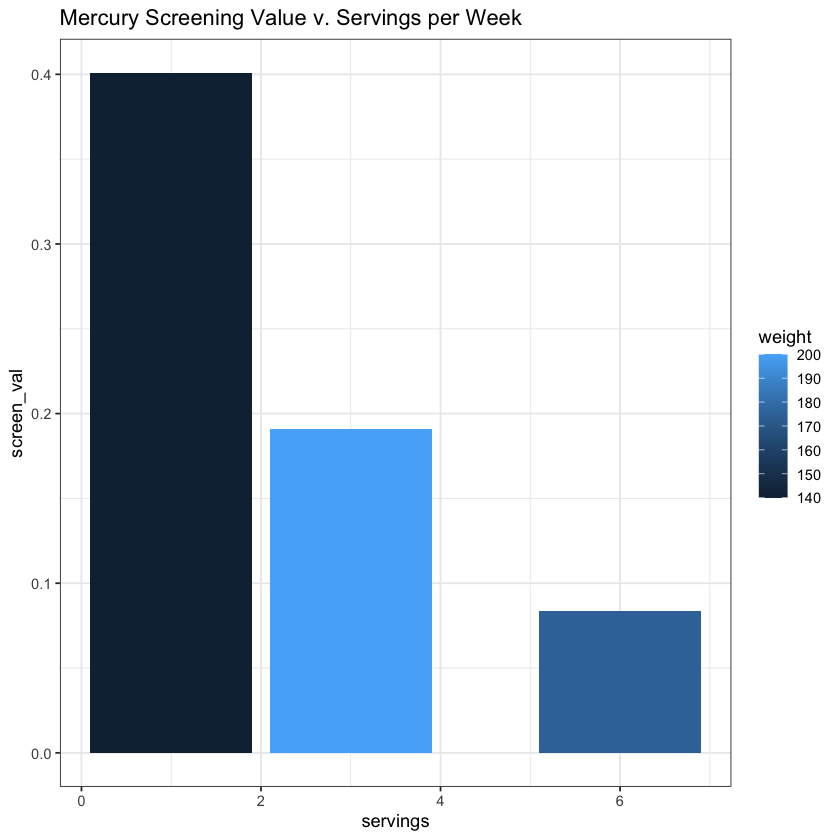

In [35]:
ggplot(data=sv_df, 
       aes(x=servings, y=screen_val, fill=weight)) + 
    geom_col() + 
    theme_bw() + 
    labs(x="Servings per week", y="Screening value (ug/g)", title="Mercury Screening Value v. Servings per Week")